# Homework 13: Machine Learning Supervised Learning

### 1. Download the dataset here: https://www.kaggle.com/sohier/calcofi and create one DataFrame for the bottle file and another for the cast file. Perform preprocessing on this dataset. You do not need to do all six types of preprocessing we discussed. For this dataset, 2-3 is all you need.

**Set-up and initial exploration**

In [98]:
# Load necessary libraries
import pandas as pd
import numpy as np

# Load in the bottle file
bottle_df = pd.read_csv('bottle.csv', low_memory=False)

# Load in the cast file
cast_df = pd.read_csv('cast.csv', low_memory=False)

In [58]:
# View the cast column list
cast_list = cast_df.columns
print(cast_list)

Index(['Cst_Cnt', 'Cruise_ID', 'Cruise', 'Cruz_Sta', 'DbSta_ID', 'Cast_ID',
       'Sta_ID', 'Quarter', 'Sta_Code', 'Distance', 'Date', 'Year', 'Month',
       'Julian_Date', 'Julian_Day', 'Time', 'Lat_Dec', 'Lat_Deg', 'Lat_Min',
       'Lat_Hem', 'Lon_Dec', 'Lon_Deg', 'Lon_Min', 'Lon_Hem', 'Rpt_Line',
       'St_Line', 'Ac_Line', 'Rpt_Sta', 'St_Station', 'Ac_Sta', 'Bottom_D',
       'Secchi', 'ForelU', 'Ship_Name', 'Ship_Code', 'Data_Type', 'Order_Occ',
       'Event_Num', 'Cruz_Leg', 'Orig_Sta_ID', 'Data_Or', 'Cruz_Num', 'IntChl',
       'IntC14', 'Inc_Str', 'Inc_End', 'PST_LAN', 'Civil_T', 'TimeZone',
       'Wave_Dir', 'Wave_Ht', 'Wave_Prd', 'Wind_Dir', 'Wind_Spd', 'Barometer',
       'Dry_T', 'Wet_T', 'Wea', 'Cloud_Typ', 'Cloud_Amt', 'Visibility',
       'DateTime', 'Day', 'Hour', 'Minute'],
      dtype='object')


In [59]:
# view the bottle column list
bottle_list = bottle_df.columns
print(bottle_list)

Index(['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 'T_degC',
       'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'BtlNum',
       'RecInd', 'T_prec', 'T_qual', 'S_prec', 'S_qual', 'P_qual', 'O_qual',
       'SThtaq', 'O2Satq', 'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM',
       'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM',
       'NH3q', 'C14As1', 'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q',
       'DarkAs', 'DarkAp', 'DarkAq', 'MeanAs', 'MeanAp', 'MeanAq', 'IncTim',
       'LightP', 'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA',
       'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_SIO3', 'R_PO4', 'R_NO3',
       'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO', 'R_PRES', 'R_SAMP', 'DIC1',
       'DIC2', 'TA1', 'TA2', 'pH2', 'pH1', 'DIC Quality Comment'],
      dtype='object')


## Bottle Pre-processing

First, we will pre-process the bottle data set

In [60]:
# Confirm number of entries
len(bottle_df.index)

864863

The vast majority of columns are floats or integers. Relatively few are non-numeric (objects)

In [61]:
# View data summary
bottle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 74 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Cst_Cnt              864863 non-null  int64  
 1   Btl_Cnt              864863 non-null  int64  
 2   Sta_ID               864863 non-null  object 
 3   Depth_ID             864863 non-null  object 
 4   Depthm               864863 non-null  int64  
 5   T_degC               853900 non-null  float64
 6   Salnty               817509 non-null  float64
 7   O2ml_L               696201 non-null  float64
 8   STheta               812174 non-null  float64
 9   O2Sat                661274 non-null  float64
 10  Oxy_µmol/Kg          661268 non-null  float64
 11  BtlNum               118667 non-null  float64
 12  RecInd               864863 non-null  int64  
 13  T_prec               853900 non-null  float64
 14  T_qual               23127 non-null   float64
 15  S_prec           

**Clean up Null Values**

With 74 columns, there are likely some features that will not be useful for an analysis. Having too many null values could hinder any predictive results that we find. Therefore, as part of the pre-processing step, I will remove columns that have more than 50% null values

In [124]:
# Which features contain null values?

# Create empty list to append null values
null_bottle = []

# Iterate through columns and values of data frame
for col, val in bottle_df.iteritems():
    # If there are any nulls...
    if bottle_df[col].isnull().sum() > 0:
        # Append the column name to the null list
        null_bottle.append(col)

# View the columns with null values
print(null_bottle)

['T_degC', 'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'BtlNum', 'T_prec', 'T_qual', 'S_prec', 'S_qual', 'P_qual', 'O_qual', 'SThtaq', 'O2Satq', 'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM', 'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM', 'NH3q', 'C14As1', 'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q', 'DarkAs', 'DarkAp', 'DarkAq', 'MeanAs', 'MeanAp', 'MeanAq', 'IncTim', 'LightP', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA', 'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_SIO3', 'R_PO4', 'R_NO3', 'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO', 'R_SAMP', 'DIC1', 'DIC2', 'TA1', 'TA2', 'pH2', 'pH1', 'DIC Quality Comment']


In [125]:
# Of that list, which columns have more than half of their values as null?

# Empty list for columns with >50% null values
null_bottle50 = []

# Iterate through the list of nulls
for col in null_bottle:
    # Divide the number of nulls by the total values in the data set
    # Multiply by 100 and round by 2 decimal points for percentage
    percent_null = round((((bottle_df[col].isnull().sum())/864863)*100),2)
    
    # Search for only columns that have more than 50% missing values
    if percent_null >= 50:
        # print the results in a format that is easy to read
        print(f'{col}: {percent_null}%')
        # append those columns to a new list
        null_bottle50.append(col)

BtlNum: 86.28%
T_qual: 97.33%
S_qual: 91.34%
O_qual: 78.65%
SThtaq: 92.39%
O2Satq: 74.82%
ChlorA: 73.95%
Phaeop: 73.95%
PO4uM: 52.21%
SiO3uM: 59.06%
NO2uM: 60.97%
NO3uM: 60.99%
NH3uM: 92.49%
C14As1: 98.33%
C14A1p: 98.52%
C14As2: 98.33%
C14A2p: 98.53%
DarkAs: 97.38%
DarkAp: 97.63%
MeanAs: 97.38%
MeanAp: 97.63%
IncTim: 98.33%
LightP: 97.84%
R_SIO3: 59.06%
R_PO4: 52.21%
R_NO3: 60.99%
R_NO2: 60.97%
R_NH4: 92.49%
R_CHLA: 73.95%
R_PHAEO: 73.95%
R_SAMP: 85.89%
DIC1: 99.77%
DIC2: 99.97%
TA1: 99.76%
TA2: 99.97%
pH2: 100.0%
pH1: 99.99%
DIC Quality Comment: 99.99%


In [126]:
# Now, we can remove those features from the data set

# Create a new df that has all columns from 'null_bottle50' removed
bottle_df = bottle_df.drop(null_bottle50, axis=1)
bottle_df.head()

# Now, we have 36 workable columns!

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_PRES
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,0.0,10.50,10.50,33.440,25.64,233.0,0.00,NaN,NaN,0
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,8.0,10.46,10.46,33.440,25.65,232.5,0.01,NaN,NaN,8
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,10.0,10.46,10.46,33.437,25.65,232.8,0.02,NaN,NaN,10
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,19.0,10.45,10.45,33.420,25.64,234.1,0.04,NaN,NaN,19
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,20.0,10.45,10.45,33.421,25.64,234.0,0.04,NaN,NaN,20


In [127]:
# See how many columns still have null values
bottle_df.isnull().sum()

Cst_Cnt             0
Btl_Cnt             0
Sta_ID              0
Depth_ID            0
Depthm              0
T_degC          10963
Salnty          47354
O2ml_L         168662
STheta          52689
O2Sat          203589
Oxy_µmol/Kg    203595
RecInd              0
T_prec          10963
S_prec          47354
P_qual         191108
Chlqua         225697
Phaqua         225693
PO4q           413077
SiO3qu         353997
NO2q           335389
NO3q           334930
NH3q            56564
C14A1q          16258
C14A2q          16240
DarkAq          24423
MeanAq          24424
R_Depth             0
R_TEMP          10963
R_POTEMP        46047
R_SALINITY      47354
R_SIGMA         52856
R_SVA           52771
R_DYNHT         46657
R_O2           168662
R_O2Sat        198415
R_PRES              0
dtype: int64

**Handle Missing Data**

Although we removed columns with >50% nulls, we still have a lot of missing values in our data set that we need to handle. For all numeric columns, we will fill the NAs with either the median or mean value. 

Neither of the categorical columns have missing data, so we can leave those alone

In [128]:
# Create new list that contains columns that still have null values

# Create empty list to append remaining null values
null_bottle_revised = []

# Iterate through columns and values of data frame
for col, val in bottle_df.iteritems():
    # If there are any nulls...
    if bottle_df[col].isnull().sum() > 0:
        # Append the column name to the null list
        null_bottle_revised.append(col)

In [129]:
# import statistics to use median function
import statistics as st

# Iterate through variables to fill the NAs with their median
for var in null_bottle_revised:
    bottle_df[var].fillna(st.median(bottle_df[var]), inplace=True)

In [130]:
# 5 of the variables have nan as their median, so fill with mean instead
bottle_df.isnull().sum()

Cst_Cnt             0
Btl_Cnt             0
Sta_ID              0
Depth_ID            0
Depthm              0
T_degC              0
Salnty              0
O2ml_L         168662
STheta              0
O2Sat          203589
Oxy_µmol/Kg    203595
RecInd              0
T_prec              0
S_prec              0
P_qual              0
Chlqua              0
Phaqua              0
PO4q                0
SiO3qu              0
NO2q                0
NO3q                0
NH3q                0
C14A1q              0
C14A2q              0
DarkAq              0
MeanAq              0
R_Depth             0
R_TEMP              0
R_POTEMP            0
R_SALINITY          0
R_SIGMA             0
R_SVA               0
R_DYNHT             0
R_O2           168662
R_O2Sat        198415
R_PRES              0
dtype: int64

In [131]:
# List of columns where we will fill nulls with mean value
mean_list = ['O2ml_L', 'O2Sat', 'Oxy_µmol/Kg', 'R_O2', 'R_O2Sat']

# Iterate through variables to fill the NAs with their mean
for var in mean_list:
    bottle_df[var].fillna(np.mean(bottle_df[var]), inplace=True)

In [133]:
# Now, all nulls have been removed
sum(bottle_df.isnull().sum())

0

**Convert Categorical Data to Numeric**

Now that the missing data have been handled, we can focus on converting the categorical data to numeric. First, we need to see how many features are categorical.

The code below displays that only two of the variables are categorical:
- Sta_ID
- Depth_ID

In [134]:
# Find which variables are categorical

# Iterate through data frame
for col, val in bottle_df.iteritems():
    # If the column type is an object...
    if bottle_df[col].dtype == 'O':
        # print the column names
        print(col)

Sta_ID
Depth_ID


In [135]:
# Convert categorical to numeric

# There are only two non-numeric features. Let's take a look at them below!
bottle_df[['Sta_ID', 'Depth_ID']].head()

# For Sta_ID column, the first value is the 'Line' and the next value is the 'Station' (according to Kaggle.com)
        # Therefore, we can separate this column into two columns, with one being 'line' and the other 'station'
        # There are 2634 unique values, so it does not make sense to do a new code for each one

# Create new column called "Sta_line"
# Look to see where the column contains a space
bottle_df['Sta_line'] = np.where(bottle_df['Sta_ID'].str.contains(' '),
                                # split where the space is and only grab the first string
                                bottle_df['Sta_ID'].str.split(' ').str[0],
                                # else, return the original column value
                                bottle_df['Sta_ID'])

# Create new column called "Sta_station"
# Look to see where the column contains a space
bottle_df['Sta_station'] = np.where(bottle_df['Sta_ID'].str.contains(' '),
                                # split where the space is and only grab the second string
                                bottle_df['Sta_ID'].str.split(' ').str[1],
                                # else, return the original column value
                                bottle_df['Sta_ID'])

# Confirm results
bottle_df[['Sta_line', 'Sta_station', 'Sta_ID']].head()

,Sta_line,Sta_station,Sta_ID
0,054.0,056.0,054.0 056.0
1,054.0,056.0,054.0 056.0
2,054.0,056.0,054.0 056.0
3,054.0,056.0,054.0 056.0
4,054.0,056.0,054.0 056.0


In [136]:
# Change the data types to be numeric
bottle_df['Sta_line'] = pd.to_numeric(bottle_df['Sta_line'])
bottle_df['Sta_station'] = pd.to_numeric(bottle_df['Sta_station'])

# Check the data types
bottle_df[['Sta_line', 'Sta_station']].dtypes

Sta_line       float64
Sta_station    float64
dtype: object

In [137]:
# Drop the Sta_ID variable, now that we no longer need it
bottle_df = bottle_df.drop('Sta_ID', axis=1)

In [138]:
# Check the depth_ID variable
bottle_df['Depth_ID'].head()

0    19-4903CR-HY-060-0930-05400560-0000A-3
1    19-4903CR-HY-060-0930-05400560-0008A-3
2    19-4903CR-HY-060-0930-05400560-0010A-7
3    19-4903CR-HY-060-0930-05400560-0019A-3
4    19-4903CR-HY-060-0930-05400560-0020A-7
Name: Depth_ID, dtype: object

In [139]:
# Because these are all unique IDs, we can just change to unique numeric IDs, rather than grouping or categorizing
bottle_df['Depth_ID_num'] = pd.factorize(bottle_df['Depth_ID'])[0] + 1

# Drop the old column
bottle_df = bottle_df.drop('Depth_ID', axis=1)

In [140]:
# Only numeric columns remain
bottle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 37 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Cst_Cnt       864863 non-null  int64  
 1   Btl_Cnt       864863 non-null  int64  
 2   Depthm        864863 non-null  int64  
 3   T_degC        864863 non-null  float64
 4   Salnty        864863 non-null  float64
 5   O2ml_L        864863 non-null  float64
 6   STheta        864863 non-null  float64
 7   O2Sat         864863 non-null  float64
 8   Oxy_µmol/Kg   864863 non-null  float64
 9   RecInd        864863 non-null  int64  
 10  T_prec        864863 non-null  float64
 11  S_prec        864863 non-null  float64
 12  P_qual        864863 non-null  float64
 13  Chlqua        864863 non-null  float64
 14  Phaqua        864863 non-null  float64
 15  PO4q          864863 non-null  float64
 16  SiO3qu        864863 non-null  float64
 17  NO2q          864863 non-null  float64
 18  NO3q

## Cast Pre-processing

Pre-process the cast data set, using the same methods as for the bottle data set

In [2]:
# View first few rows of cast data
cast_df.head()

,Cst_Cnt,Cruise_ID,Cruise,Cruz_Sta,DbSta_ID,Cast_ID,Sta_ID,Quarter,Sta_Code,Distance,...,Wave_Prd,Wind_Dir,Wind_Spd,Barometer,Dry_T,Wet_T,Wea,Cloud_Typ,Cloud_Amt,Visibility
0,1,1949-03-01-C-31CR,194903,19490305400560,5400560,19-4903CR-HY-060-0930-05400560,054.0 056.0,1,NST,NaN,...,NaN,23.0,18.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
1,2,1949-03-01-C-31CR,194903,19490305200750,5200750,19-4903CR-HY-060-2112-05200750,052.0 075.0,1,NST,NaN,...,NaN,16.0,5.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN
2,3,1949-03-01-C-31CR,194903,19490305100850,5100850,19-4903CR-HY-061-0354-05100850,051.0 085.0,1,NST,NaN,...,NaN,23.0,5.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN
3,4,1949-03-01-C-31CR,194903,19490305000950,5000950,19-4903CR-HY-061-1042-05000950,050.0 095.0,1,NST,NaN,...,NaN,18.0,8.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
4,5,1949-03-01-C-31CR,194903,19490305001040,5001040,19-4903CR-HY-061-1706-05001040,050.0 104.0,1,NST,NaN,...,NaN,27.0,13.0,NaN,NaN,NaN,7.0,NaN,NaN,NaN


**Clean up null values**

As we did for the bottle data set, we will remove all variables that have >50% missing. This is because these variables will not contain enough data to give us robust results. 

In [99]:
# Which features contain null values?

# Create empty list to append null values
null_cast = []

# Iterate through columns and values of data frame
for col, val in cast_df.iteritems():
    # If there are any nulls...
    if cast_df[col].isnull().sum() > 0:
        # Append the column name to the null list
        null_cast.append(col)

# View the columns with null values
print(null_cast)

['Distance', 'Time', 'Bottom_D', 'Secchi', 'ForelU', 'Ship_Name', 'Order_Occ', 'Event_Num', 'Cruz_Leg', 'Data_Or', 'IntChl', 'IntC14', 'Inc_Str', 'Inc_End', 'PST_LAN', 'Civil_T', 'TimeZone', 'Wave_Dir', 'Wave_Ht', 'Wave_Prd', 'Wind_Dir', 'Wind_Spd', 'Barometer', 'Dry_T', 'Wet_T', 'Wea', 'Cloud_Typ', 'Cloud_Amt', 'Visibility']


In [100]:
# Check if any have great than 50% missing

# Iterate through the list of nulls
for col in null_cast:
    # Divide the number of nulls by the total values in the data set
    # Multiply by 100 and round by 2 decimal points for percentage
    percent_null = round((((cast_df[col].isnull().sum())/864863)*100),2)
    
    # Search for only columns that have more than 50% missing values
    if percent_null > 0:
        # print the results in a format that is easy to read
        print(f'{col}: {percent_null}%')

Distance: 1.7%
Time: 0.04%
Bottom_D: 0.26%
Secchi: 3.37%
ForelU: 3.74%
Ship_Name: 0.2%
Order_Occ: 2.83%
Cruz_Leg: 3.81%
Data_Or: 1.86%
IntChl: 2.57%
IntC14: 3.73%
Inc_Str: 3.73%
Inc_End: 3.73%
PST_LAN: 3.73%
Civil_T: 3.73%
TimeZone: 3.43%
Wave_Dir: 2.53%
Wave_Ht: 2.58%
Wave_Prd: 2.63%
Wind_Dir: 0.17%
Wind_Spd: 0.19%
Barometer: 1.77%
Dry_T: 1.77%
Wet_T: 1.78%
Wea: 0.88%
Cloud_Typ: 2.83%
Cloud_Amt: 2.6%
Visibility: 2.88%


Actually, none of the features have that many null values. Therefore, we do not need to remove any of the columns. We can proceed to the next step.

**Handle Missing Data**

For the nulls that are remaining, we can fill them in with different values.

In [101]:
# For numeric features, fill the NAs either with the median or the mean

import statistics as st

# Iterate through variables to fill the NAs with their median
for var in null_cast:
    # Check to make sure variable type is not an object
    if cast_df[var].dtypes != 'O':
        # Fill the NAs with median value
        cast_df[var].fillna(st.median(cast_df[var]), inplace=True)
    # Fill non-numeric vars with 999
    else:
        cast_df[var].fillna(999, inplace=True)

In [102]:
# Create list of vars where we will fill with the mean
cast_mean_list = ['Bottom_D', 'Secchi', 'ForelU', 'Order_Occ', 'Cruz_Leg', 'IntChl', 'IntC14', 'IntC14', 'TimeZone',
            'Wea', 'Cloud_Typ']

# Iterate through variables to fill the NAs with their mean
for var in cast_mean_list:
    cast_df[var].fillna(np.mean(cast_df[var]), inplace=True)

In [103]:
# Iterate through the list of nulls
for col in null_cast:
    # Divide the number of nulls by the total values in the data set
    # Multiply by 100 and round by 2 decimal points for percentage
    percent_null = round((((cast_df[col].isnull().sum())/864863)*100),2)
    
    # Search for only columns that have more than 50% missing values
    if percent_null > 0:
        # print the results in a format that is easy to read
        print(f'{col}: {percent_null}%')
        
# No more nulls remain

**Convert categorical to numeric**: Now that we have no more missing values in our cast data frame, we can convert any remaining categorical features to be numeric. 

In [104]:
# Find which variables are categorical
cat_list = []

# Iterate through data frame
for col, val in cast_df.iteritems():
    # If the column type is an object...
    if cast_df[col].dtype == 'O':
        # print the column names
        cat_list.append(col)
print(cat_list)

['Cruise_ID', 'Cast_ID', 'Sta_ID', 'Sta_Code', 'Date', 'Time', 'Lat_Hem', 'Lon_Hem', 'Ship_Name', 'Ship_Code', 'Data_Type', 'Orig_Sta_ID', 'Data_Or', 'Cruz_Num', 'Inc_Str', 'Inc_End', 'PST_LAN', 'Civil_T']


In [21]:
# View what our categorical values look like
cast_cat = cast_df[cat_list]
cast_cat.tail()

,Cruise_ID,Cast_ID,Sta_ID,Sta_Code,Date,Time,Lat_Hem,Lon_Hem,Ship_Name,Ship_Code,Data_Type,Orig_Sta_ID,Data_Or,Cruz_Num,Inc_Str,Inc_End,PST_LAN,Civil_T
34399,2016-11-06-C-33SR,20-1611SR-MX-313-03:14-09330900,093.3 090.0,ST,11/09/2016,03:14:49,N,W,RV SALLY RIDE,33SR,MX,93.3 90.0,3101,1611,999,999,999,999
34400,2016-11-06-C-33SR,20-1611SR-MX-313-08:51-09331000,093.3 100.0,ST,11/09/2016,08:51:14,N,W,RV SALLY RIDE,33SR,MX,93.3 100.0,3101,1611,999,999,999,999
34401,2016-11-06-C-33SR,20-1611SR-MX-313-14:48-09331100,093.3 110.0,ST,11/09/2016,14:48:56,N,W,RV SALLY RIDE,33SR,MX,93.3 110.0,3101,1611,999,999,999,999
34402,2016-11-06-C-33SR,20-1611SR-MX-313-20:53-09331200,093.3 120.0,ST,11/09/2016,20:53:27,N,W,RV SALLY RIDE,33SR,MX,93.3 120.0,3101,1611,999,999,999,999
34403,2016-11-06-C-33SR,20-1611SR-MX-310-22:39-09340264,093.4 026.4,ST,11/06/2016,22:39:25,N,W,RV SALLY RIDE,33SR,MX,93.4 26.4,3101,1611,999,999,999,999


In [105]:
# Iterate through to see how many unique values we have for each column
for var in cat_list:
    print(f'{var} {cast_cat[var].nunique()}')

Cruise_ID 645
Cast_ID 34404
Sta_ID 2634
Sta_Code 7
Date 6466
Time 2731
Lat_Hem 1
Lon_Hem 1
Ship_Name 34
Ship_Code 33
Data_Type 5
Orig_Sta_ID 4190
Data_Or 5
Cruz_Num 378
Inc_Str 116
Inc_End 201
PST_LAN 80
Civil_T 182


The "Sta_ID" variable can be converted to numeric in the same way we did the bottle data frame.

With the exception of the date and time variables, we can factorize the remaining non-numeric columns. That will be handled in the code below.

In [106]:
# Convert categorical to numeric

# For Sta_ID column, the first value is the 'Line' and the next value is the 'Station' (according to Kaggle.com)
        # Therefore, we can separate this column into two columns, with one being 'line' and the other 'station'
        # There are 2634 unique values, so it does not make sense to do a new code for each one

# Create new column called "Sta_line"
# Look to see where the column contains a space
cast_df['Sta_line'] = np.where(cast_df['Sta_ID'].str.contains(' '),
                                # split where the space is and only grab the first string
                                cast_df['Sta_ID'].str.split(' ').str[0],
                                # else, return the original column value
                                cast_df['Sta_ID'])

# Create new column called "Sta_station"
# Look to see where the column contains a space
cast_df['Sta_station'] = np.where(cast_df['Sta_ID'].str.contains(' '),
                                # split where the space is and only grab the second string
                                cast_df['Sta_ID'].str.split(' ').str[1],
                                # else, return the original column value
                                cast_df['Sta_ID'])

# Confirm results
cast_df[['Sta_line', 'Sta_station', 'Sta_ID']].head()

,Sta_line,Sta_station,Sta_ID
0,054.0,056.0,054.0 056.0
1,052.0,075.0,052.0 075.0
2,051.0,085.0,051.0 085.0
3,050.0,095.0,050.0 095.0
4,050.0,104.0,050.0 104.0


In [107]:
# Change the data types to be numeric
cast_df['Sta_line'] = pd.to_numeric(cast_df['Sta_line'])
cast_df['Sta_station'] = pd.to_numeric(cast_df['Sta_station'])

# Check the data types
cast_df[['Sta_line', 'Sta_station']].dtypes

Sta_line       float64
Sta_station    float64
dtype: object

In [108]:
# Drop the Sta_ID variable, now that we no longer need it
cast_df = cast_df.drop('Sta_ID', axis=1)

Now, handle the date time variables!

In [109]:
# drop date and time variables from our list
cat_list.remove('Date')
cat_list.remove('Time')
cat_list.remove('Sta_ID')

# Iterate through the list of categorical column
for var in cat_list:
    cast_df[var] = pd.factorize(cast_df[var])[0] + 1 # add 1 so that we aren't starting with 0

In [110]:
# Confirm that the date and time columns are still in our list as objects
cast_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34404 entries, 0 to 34403
Data columns (total 62 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Cst_Cnt      34404 non-null  int64  
 1   Cruise_ID    34404 non-null  int64  
 2   Cruise       34404 non-null  int64  
 3   Cruz_Sta     34404 non-null  int64  
 4   DbSta_ID     34404 non-null  int64  
 5   Cast_ID      34404 non-null  int64  
 6   Quarter      34404 non-null  int64  
 7   Sta_Code     34404 non-null  int64  
 8   Distance     34404 non-null  float64
 9   Date         34404 non-null  object 
 10  Year         34404 non-null  int64  
 11  Month        34404 non-null  int64  
 12  Julian_Date  34404 non-null  int64  
 13  Julian_Day   34404 non-null  int64  
 14  Time         34404 non-null  object 
 15  Lat_Dec      34404 non-null  float64
 16  Lat_Deg      34404 non-null  int64  
 17  Lat_Min      34404 non-null  float64
 18  Lat_Hem      34404 non-null  int64  
 19  Lon_

In [111]:
# Replace the 999s from earlier with '00:00:00' since this will be easier for processing
cast_df['Time'] = np.where(cast_df['Time']==999,'00:00:00',cast_df['Time'])

In [112]:
# Join the date variable and the time variable into one
cast_df['DateTime'] = cast_df['Date'].astype(str) + ' ' + cast_df['Time'].astype(str)
# View the new variable
cast_df['DateTime'].head()

0    03/01/1949 09:30:00
1    03/01/1949 21:12:00
2    03/02/1949 03:54:00
3    03/02/1949 10:42:00
4    03/02/1949 17:06:00
Name: DateTime, dtype: object

In [113]:
from datetime import datetime

# Change string variable to datetime format for our feature engineering
cast_df['DateTime'] = pd.to_datetime(cast_df['DateTime'])

In [114]:
# Extract the individual months, days, years, times, etc. for feature engineering
cast_df['Month'] = cast_df['DateTime'].apply(lambda row: row.month)
cast_df['Day'] = cast_df['DateTime'].apply(lambda row: row.day)
cast_df['Year'] = cast_df['DateTime'].apply(lambda row: row.year)
cast_df['Hour'] = cast_df['DateTime'].apply(lambda row: row.hour)
cast_df['Minute'] = cast_df['DateTime'].apply(lambda row: row.minute)

In [115]:
# Verify that our feature engineering was correct
cast_df[['DateTime', 'Month', 'Day', 'Year', 'Hour', 'Minute']].head()

,DateTime,Month,Day,Year,Hour,Minute
0,1949-03-01 09:30:00,3,1,1949,9,30
1,1949-03-01 21:12:00,3,1,1949,21,12
2,1949-03-02 03:54:00,3,2,1949,3,54
3,1949-03-02 10:42:00,3,2,1949,10,42
4,1949-03-02 17:06:00,3,2,1949,17,6


In [116]:
# Confirm they are in the proper data type format
cast_df[['Month', 'Day', 'Year', 'Hour', 'Minute']].dtypes

Month     int64
Day       int64
Year      int64
Hour      int64
Minute    int64
dtype: object

In [117]:
# Now that we no longer need them, we can drop all of the other time-related variables
cast_final = cast_df.drop(['DateTime', 'Time', 'Date'], axis=1)

In [118]:
# Final view of our data frame
cast_final.head()

,Cst_Cnt,Cruise_ID,Cruise,Cruz_Sta,DbSta_ID,Cast_ID,Quarter,Sta_Code,Distance,Year,...,Wet_T,Wea,Cloud_Typ,Cloud_Amt,Visibility,Sta_line,Sta_station,Day,Hour,Minute
0,1,1,194903,19490305400560,5400560,1,1,1,-69.12,1949,...,8.7,2.0,5.636895,3.5,6.5,54.0,56.0,1,9,30
1,2,1,194903,19490305200750,5200750,2,1,1,-69.12,1949,...,8.7,4.0,5.636895,3.5,6.5,52.0,75.0,1,21,12
2,3,1,194903,19490305100850,5100850,3,1,1,-69.12,1949,...,8.7,6.0,5.636895,3.5,6.5,51.0,85.0,2,3,54
3,4,1,194903,19490305000950,5000950,4,1,1,-69.12,1949,...,8.7,2.0,5.636895,3.5,6.5,50.0,95.0,2,10,42
4,5,1,194903,19490305001040,5001040,5,1,1,-69.12,1949,...,8.7,7.0,5.636895,3.5,6.5,50.0,104.0,2,17,6


In [119]:
# Verified that all features are numeric
cast_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34404 entries, 0 to 34403
Data columns (total 63 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Cst_Cnt      34404 non-null  int64  
 1   Cruise_ID    34404 non-null  int64  
 2   Cruise       34404 non-null  int64  
 3   Cruz_Sta     34404 non-null  int64  
 4   DbSta_ID     34404 non-null  int64  
 5   Cast_ID      34404 non-null  int64  
 6   Quarter      34404 non-null  int64  
 7   Sta_Code     34404 non-null  int64  
 8   Distance     34404 non-null  float64
 9   Year         34404 non-null  int64  
 10  Month        34404 non-null  int64  
 11  Julian_Date  34404 non-null  int64  
 12  Julian_Day   34404 non-null  int64  
 13  Lat_Dec      34404 non-null  float64
 14  Lat_Deg      34404 non-null  int64  
 15  Lat_Min      34404 non-null  float64
 16  Lat_Hem      34404 non-null  int64  
 17  Lon_Dec      34404 non-null  float64
 18  Lon_Deg      34404 non-null  int64  
 19  Lon_

In [120]:
# Verfied that there are no nulls in our final data set.
sum(cast_final.isnull().sum())

0

### 2. Create a correlation matrix to see how the features are correlated. Describe your findings. Pay particular attention to what is correlated with water temperature.

Because we only need the bottle data set for the following analysis, I will conduct the correlation matrix on that data set only. This will be helpful for us to know if there is any multicollinearity in our variables of interest. If we identify multicollinearity, then we will know not to use those variables in our model.

I will also narrow our data set to more specific variables of interest. After examining the meta data with information about each variable, I have decided to remove the 'quality code' variables, as these measure are not as precise as levels of oxygen, salinity, nitrates, etc. Moreover, I believe the variables below are more likely to be used in models to predict water temperature.

In [141]:
# Create list of variables to keep
keep_vars = ['Cst_Cnt', 'Btl_Cnt', 'Depthm', 'T_degC', 'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 
              'T_prec', 'S_prec', 'R_Depth', 'R_TEMP', 'R_POTEMP','R_SALINITY', 'R_SIGMA', 'R_SVA', 'R_DYNHT', 
              'R_O2', 'R_O2Sat', 'R_PRES', 'Sta_line', 'Sta_station']

In [142]:
# Revise data frame to only keep these vars
bottle_small = bottle_df[keep_vars]

In [143]:
# View our revised df
bottle_small.head()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,T_prec,...,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_PRES,Sta_line,Sta_station
0,1,1,0,10.50,33.440,3.392468,25.649,57.103779,148.808694,1.0,...,10.50,33.440,25.64,233.0,0.00,3.392498,57.19294,0,54.0,56.0
1,1,2,8,10.46,33.440,3.392468,25.656,57.103779,148.808694,2.0,...,10.46,33.440,25.65,232.5,0.01,3.392498,57.19294,8,54.0,56.0
2,1,3,10,10.46,33.437,3.392468,25.654,57.103779,148.808694,2.0,...,10.46,33.437,25.65,232.8,0.02,3.392498,57.19294,10,54.0,56.0
3,1,4,19,10.45,33.420,3.392468,25.643,57.103779,148.808694,2.0,...,10.45,33.420,25.64,234.1,0.04,3.392498,57.19294,19,54.0,56.0
4,1,5,20,10.45,33.421,3.392468,25.643,57.103779,148.808694,2.0,...,10.45,33.421,25.64,234.0,0.04,3.392498,57.19294,20,54.0,56.0


In [144]:
# View our initial correlations
bottle_small.corr()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,T_prec,...,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_PRES,Sta_line,Sta_station
Cst_Cnt,1.000000,0.999345,-0.162222,0.094036,-0.172835,0.146288,-0.131097,0.122815,0.132695,0.068282,...,-0.016025,-0.172380,-0.145558,0.113221,-0.079260,0.146307,0.120155,-0.161961,-0.173673,-0.009522
Btl_Cnt,0.999345,1.000000,-0.161617,0.094881,-0.170271,0.144570,-0.130531,0.121268,0.130957,0.063216,...,-0.015147,-0.169822,-0.144994,0.112864,-0.079608,0.144590,0.118613,-0.161348,-0.169601,-0.009445
Depthm,-0.162222,-0.161617,1.000000,-0.670283,0.536874,-0.532769,0.550979,-0.512682,-0.507193,0.019953,...,-0.587216,0.535529,0.571514,-0.632588,0.812402,-0.532769,-0.511864,0.999994,-0.012335,0.156867
T_degC,0.094036,0.094881,-0.670283,1.000000,-0.477736,0.705204,-0.801326,0.741215,0.693237,-0.039526,...,0.882294,-0.476515,-0.833620,0.933781,-0.725686,0.705204,0.738129,-0.668970,0.232773,-0.038269
Salnty,-0.172835,-0.170271,0.536874,-0.477736,1.000000,-0.716301,0.568785,-0.706623,-0.737114,-0.018146,...,-0.499100,0.997441,0.591642,-0.689909,0.657913,-0.716302,-0.704850,0.535656,0.333165,-0.055796
O2ml_L,0.146288,0.144570,-0.532769,0.705204,-0.716301,1.000000,-0.668659,0.965814,0.972406,0.000535,...,0.647468,-0.714429,-0.690765,0.778705,-0.641349,0.999998,0.968817,-0.531240,-0.104049,0.077666
STheta,-0.131097,-0.130531,0.550979,-0.801326,0.568785,-0.668659,1.000000,-0.708195,-0.679128,0.024126,...,-0.704559,0.567361,0.956764,-0.846224,0.621323,-0.668660,-0.702958,0.549788,-0.048859,-0.016753
O2Sat,0.122815,0.121268,-0.512682,0.741215,-0.706623,0.965814,-0.708195,1.000000,0.993336,-0.004657,...,0.724098,-0.704774,-0.731062,0.834713,-0.672946,0.965813,0.994242,-0.511196,-0.056668,0.070874
Oxy_µmol/Kg,0.132695,0.130957,-0.507193,0.693237,-0.737114,0.972406,-0.679128,0.993336,1.000000,-0.002683,...,0.677377,-0.735186,-0.700614,0.798867,-0.665640,0.972405,0.987659,-0.505668,-0.097518,0.076718
T_prec,0.068282,0.063216,0.019953,-0.039526,-0.018146,0.000535,0.024126,-0.004657,-0.002683,1.000000,...,-0.044799,-0.018089,0.023747,-0.029355,0.017336,0.000535,-0.004690,0.019975,-0.072287,-0.024468


In [146]:
# Revise the above to eliminate the perfect correlations (vars with themselves)
# Also eliminate duplicate entries
# This will make our matrix easier to interpret

import warnings
warnings.filterwarnings('ignore')

# First get the correlations from our data frame
# I am taking the absolute value because for the purposes of gaining insight from a correlation matrix, and knowing
   ### which variables won't work in our model, the direction of the correlation is not very important. 
   ### what we care about most is the magnitude of the correlation. 
   ### Additionally, this will make the resulting heat map much easier to read so that strong negative correlations are 
    ### represented visually the same as strong positive correlations
bottle_corr = abs(bottle_small.corr())

# Reading code line from inside out...
        # Get the shape of loans_corr (it is a 10x10 matrix)
        # Use np.ones to replace all values with ones in the same shape as loans_corr (10,10 matrix)
        # Wrap inside np.triu, in order to create an upper triangle of the matrix
                # Upper diagonal of matrix are now 1s and lower diagonal of matrix are zeros
        # Create boolean where 1s are 'true' and 0s are 'false' (this is needed for mask function in next step)
        # mask the resulting array to be the same shape/type as the original loans_corr
                # We are only maintaining the values, where the boolean would be 'false'
bottle_corr_tri = bottle_corr.mask(np.triu(np.ones(bottle_corr.shape)).astype(np.bool))

# Now, we no longer have the duplicates, nor the perfect correlations!

In [147]:
# Drop the first row and the last column, since those are only NAs
bottle_corr_tri = bottle_corr_tri.drop(index='Cst_Cnt', columns='Sta_station')
bottle_corr_tri.head(10)

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,T_prec,...,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_PRES,Sta_line
Btl_Cnt,0.999345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Depthm,0.162222,0.161617,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
T_degC,0.094036,0.094881,0.670283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salnty,0.172835,0.170271,0.536874,0.477736,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
O2ml_L,0.146288,0.144570,0.532769,0.705204,0.716301,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
STheta,0.131097,0.130531,0.550979,0.801326,0.568785,0.668659,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
O2Sat,0.122815,0.121268,0.512682,0.741215,0.706623,0.965814,0.708195,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Oxy_µmol/Kg,0.132695,0.130957,0.507193,0.693237,0.737114,0.972406,0.679128,0.993336,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
T_prec,0.068282,0.063216,0.019953,0.039526,0.018146,0.000535,0.024126,0.004657,0.002683,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
S_prec,0.493341,0.491780,0.019725,0.004276,0.049367,0.041084,0.065530,0.015887,0.023994,0.089999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [148]:
# Round everything to 2 decimal places so that heatmap is easier to read
bottle_corr_tri2 = bottle_corr_tri.round(2)

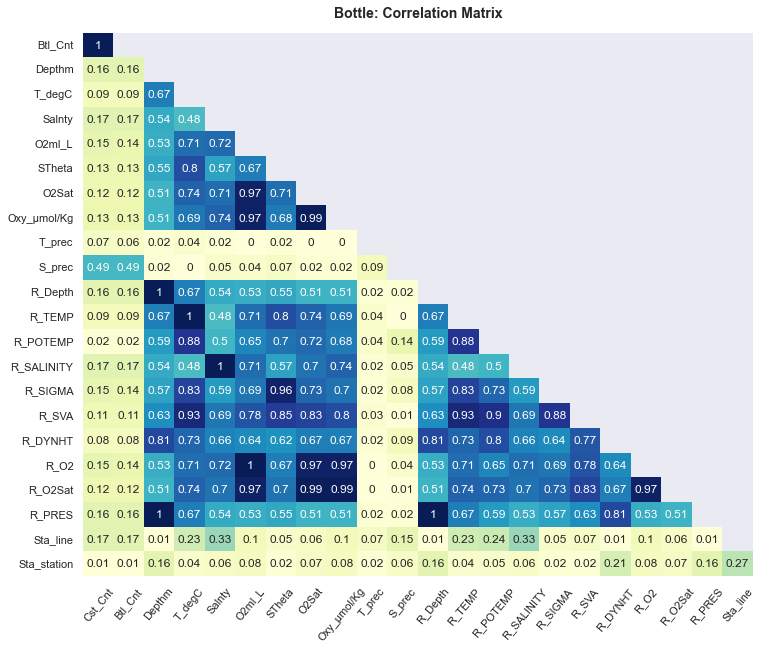

In [151]:
# load necessary libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(12,10)})

# Visually display the matrix from above
# use the yellow-green-blue color map so that high correlations are more easily identifiable
h = sns.heatmap(bottle_corr_tri2, annot=True, cmap="YlGnBu", cbar=False)

# Add plot title 
h.set_title('Bottle: Correlation Matrix', size=14, weight='bold', pad=15)

# rotate tick marks so they are easier to read
plt.xticks(rotation=50)

# Make plots larger
#plt.rcParams.update({'figure.figsize':(12,5), 'figure.dpi':100})

# Display plot
plt.show()

**Summary of findings**: The heat map displays the magnitude of correlations between variables in our data frame. At this point, we are not interested in direction, so only absolute values are given. This also makes the heat map easier to read. For any high correlations, we can later compute the correlation coefficient and examine the direction of the relationship.

Many of the variables have reasonably high correlations with each other. However, because our model will be designed to predict water temperature, that is the variable I will focus on. Water temperature is highly correlated with almost every variable in our refined data frame. The lowest correlation (nearly 0) is with S_prec, which is 'Salinitiy units of precision.' However, it has a moderately strong correlation with salinity (our independent variable of interest). 

Water temperature has a perfect correlation with 'R_Temp'. This makes sense, given that R_Temp is the recorded temperature. The correlation with recorded potential temperature (R_POTEMP) is also fairly high, which makes sense as well. 

Water temperature is also highly correlated with variables that relate to oxygen levels. Specifically: Milliliters of dissolved oxygen per Liter seawater (O2ml_L), oxygen saturation (O2_sat), oxygen in micro moles per kilogram of seawater (Oxy_µmol/Kg), reported oxygen (R_O2), and reported oxygen saturation (R_O2Sat).

Finally, water temperature was also highly correlated with: Reported potential density of water (R_SIGMA), potential density of water (STheta), recorded depth (R_Depth), reported specific volume anomaly (R_SVA), reported dynamic height (R_DYNHT), and pressure in decibars (R_PRES).


Our next variable of interest (salinity) also has high correlations with many variables. There is a perfect correlation between water salinity and recorded water salinity, which is unsurprising. We would definitely not want to put both of those variables together in our model. Salinity also seems to be highly correlated with all of the oxygen variables. This is logical because oxygen solubility is dependent on water salinity. Therefore, these measures would also not be great to mix together in a model.

In general, there seem to be many redundancies in our data frame, which explains a lot of these higher correlations. The data frame contains both actual and recorded measures. There are also variables that measure the same characteristic in different ways (e.g. multiple types of oxygen measurenments or multiple types of salinity measurements). This level of redundancy is important to note whenever building any models.

### 3. Perform linear regression on the dataset to see if you can predict water temperature based on salinity. 

I will continue to use the bottle data set, since that is the one that contains the water temperature and salinity variables

In [37]:
# Need bottle file: T_degC (water temperature) and Salnty (water salinity)

# Import LinearRegression and Train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Set up independent variable
X = np.array(bottle_df['Salnty']).reshape(-1,1)
# Set up dependent variable
y = np.array(bottle_df['T_degC']).reshape(-1,1)

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create the regressor: reg
reg = LinearRegression()

# Fit the regressor to the training data
reg.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg.predict(X_test)

# List of predicted values
y_pred

array([[ 7.78860894],
       [ 7.24878397],
       [ 8.77378952],
       ...,
       [ 7.49620375],
       [12.18368395],
       [ 9.12017722]])

### 4. Find your mean squared error and R2 values. Be sure to indicate what these tell you. You can import these from sklearn.metrics.

In [38]:
# Import r2_score and mean_square_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr

# Calculate the mean squared
mse = mean_squared_error(y_test, y_pred)
mse_val = round(mse,2)
print(f'Mean squared error: {mse_val}')

# get r-squared value to measure performance
r2 = r2_score(y_test, y_pred)
r2_val = round((r2),2)
print(f'R2 value: {r2_val}')

# Calculate R value, just to confirm results and see basic correlation direction
corr_coeff = pearsonr(bottle_df['Salnty'],bottle_df['T_degC'])
print(f'R value: {round(corr_coeff[0],2)}')

Mean squared error: 13.87
R2 value: 0.23
R value: -0.48


The **mean squared error** is approximately 13.87, which indicates a moderate difference between our actual and predicted values. Our model definitely contains errors that we would want to minimize further if possible. We would need to compare the mean squared error of this model to another to see which is better. The lower the mean squared error, the better the model. 

The **R-squared value** is about 0.23. This indicates that approximately 23% of the variability in water temperature can be explained by water salinity. Given that this value is fairly low, we would likely want to refine our model. We might need to add a few more independent variables and conduct a multiple linear regression instead. Or, we might find that water salinity is not useful in our model at all, for predicting water temperature. More testing and analysis would need to be done to determine this.

Additionally, the **Correlation coefficient** indicates a moderate negative correlation between water temperature and salinity. This further indicates that a simple linear model might not be the best way to represent the relationship between water salinity and water temperature.

### 5. Create a final plot of the relationship between water temperature and salinity. Be sure to show the values from the dataset in a scatter plot with a trend line that shows the predicted temperature values.

In [39]:
# Reshape the x and y variables to prepare for plotting in seaborn
x_reshaped=X_test.reshape(-1)
y_reshaped=y_test.reshape(-1)

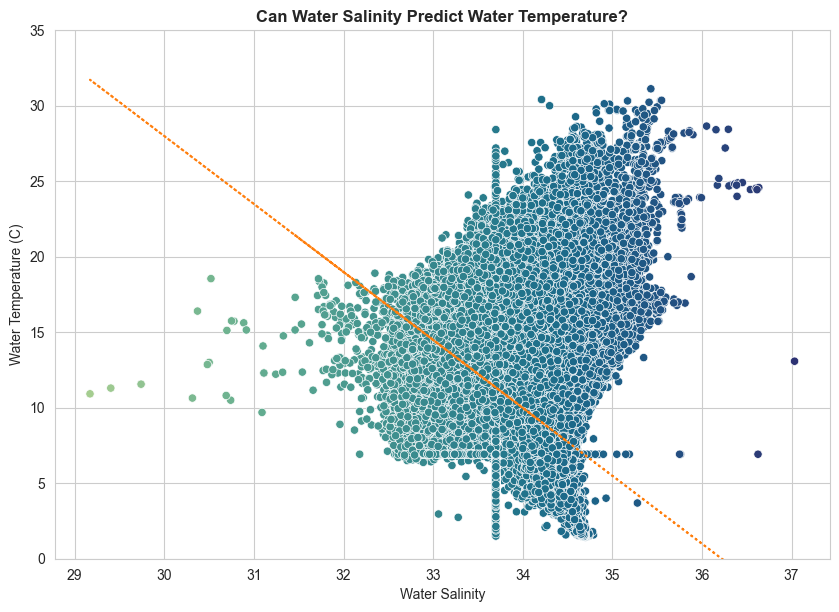

In [41]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set up plot size
plt.rcParams.update({'figure.figsize':(10,7), 'figure.dpi':100})

# Add gridlines so that values are easier to read
sns.set_style("whitegrid")

# Create scatter plot of our actual values
# Reshape into 1-dimension to be used in Seaborn
g = sns.scatterplot(x=x_reshaped, 
                    y=y_reshaped,
                   hue=X_test.reshape(-1),
                   palette='crest',
                   legend=False)

# Set the titles of the plot and the axes
g.set_title('Can Water Salinity Predict Water Temperature?', weight='bold')
g.set_ylabel('Water Temperature (C)')
g.set_xlabel('Water Salinity')

# Plot the regression line (trend line)
plt.plot(X_test, y_pred, color = 'tab:orange', linestyle='dotted')
# Set range of y-axis
plt.ylim(0, 35)

# Display plot
plt.show()

### 6. Do some research on polynomial regression. Describe what it is any how it works in markdown. This article is useful https://machinelearningmastery.com/polynomial-features-transforms-for-machine-learning/ .

Polynomial regression is a method for fitting a more accurate trendline to your data, when a straight, simple linear line to the 1st order will not suffice. Despite the polynomial trendline becomming curved, it is technically still a form of linear regression. 

To conduct the polynomial regression, the input data must first be transformed to the nth order. However, it is important to note that an order greater than 4 is rarely ever necessary. The transformation would include raising your input variable (x) to the nth degree, depending on what order you are raising your data to. With each degree of x, you are adding a new feature to your model. For example, transforming you input (x) to the 3rd degree would *add* two new features, with a total of three features in your model: 1) The original value of x; 2) x to the power of 2; and 3) x to the power of 3.

### 7. Perform polynomial regression on this same dataset. Train and validate your model as you did when you used linear regression. Mean squared error and R2 both apply here.

In [42]:
# Import the polynomial features function
from sklearn.preprocessing import PolynomialFeatures

# Set up independent variable (same as before); call X2 to differentiate
X2 = np.array(bottle_df['Salnty']).reshape(-1,1)
# Set up dependent variable (same as before); call y2 to differentiate
y2 = np.array(bottle_df['T_degC']).reshape(-1,1)

# Set up the polynomial features classifier to the 5th degree
poly_features= PolynomialFeatures(degree=5)
# Fit the classifier to our X2 value (water salinity)
x_poly = poly_features.fit_transform(X2)

# Create training and test sets
# Use the transformed x-value (x_poly) when splitting the data
X_train2, X_test2, y_train2, y_test2 = train_test_split(x_poly, y2, test_size = 0.3, random_state=42)

# Create the regressor
reg2 = LinearRegression()

# Fit the regressor to the revised training data
reg2.fit(X_train2, y_train2)

# Predict on the revised testing data
y_pred_poly = reg2.predict(X_test2)

In [43]:
# Calculate the revised mean squared
mse = mean_squared_error(y_test2, y_pred_poly)
mse_val = round(mse,2)
print(f'Revised Mean squared error: {mse_val}')

# get r-squared value to measure performance
r2 = r2_score(y_test2, y_pred_poly)
r2_val = round((r2),2)
print(f'Revised R2 value: {r2_val}')

Revised Mean squared error: 11.87
Revised R2 value: 0.34


After applying a polynomial transformation to our data and re-running the regression...there is a slightly improvement in our model. The mean squared error was reduced to 11.87 (down from 13.87 in the previous model). Additionally, water salinity now accounts for 34% of the variability in water temperature, when using this revised model. With the other model, it only explained 23% of the variability.

I chose the 5th degree because this was the lowest order with the highest performance. Starting from the 1st order, with each order increase, the r-squared value increased and the mean squared error decreased. However, once I got to an order of 6, there was little to no difference in performance. Thus, I settled on an order of 5 for this model.

Additionally, I experimented with different order on the plot below before settling on 5. None of them seem to be a great fit, but the model looked best with a 5th order, compared to others.

### 8. Create a final plot of the relationship between water temperature and salinity. Be sure to show the values from the dataset in a scatter plot with a trend line that shows the polynomial regression predicted temperature values. The resulting trend line should be curved.

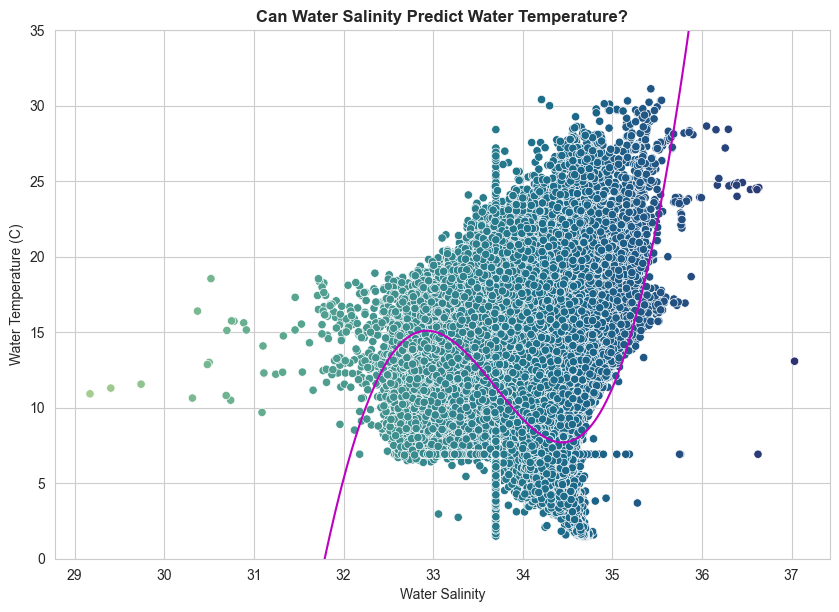

In [44]:
# Set up plot size
plt.rcParams.update({'figure.figsize':(10,7), 'figure.dpi':100})

# Add gridlines so that values are easier to read
sns.set_style("whitegrid")

# Create scatter plot of our actual values
# Retain the same testing data from previous question, so that we can have our original data points
g = sns.scatterplot(x=x_reshaped, 
                    y=y_reshaped,
                   hue=X_test.reshape(-1),
                   palette='crest',
                   legend=False)

# Set the titles of the plot and the axes
g.set_title('Can Water Salinity Predict Water Temperature?', weight='bold')
g.set_ylabel('Water Temperature (C)')
g.set_xlabel('Water Salinity')

# Organize and sort the values of the testing data and the new predicted data
# Pair input and output together and sort
sorted_zip = sorted(zip(X_test, y_pred_poly))
# Separate back out into input and output
X_test, y_pred_poly = zip(*sorted_zip)
# Plot the testing data with the revised predicted data
# Use same color as previous plot to compare
plt.plot(X_test, y_pred_poly, color='m')

# Set range of y-axis
plt.ylim(0, 35)

# Display plot
plt.show()

# Data Camp Certificates

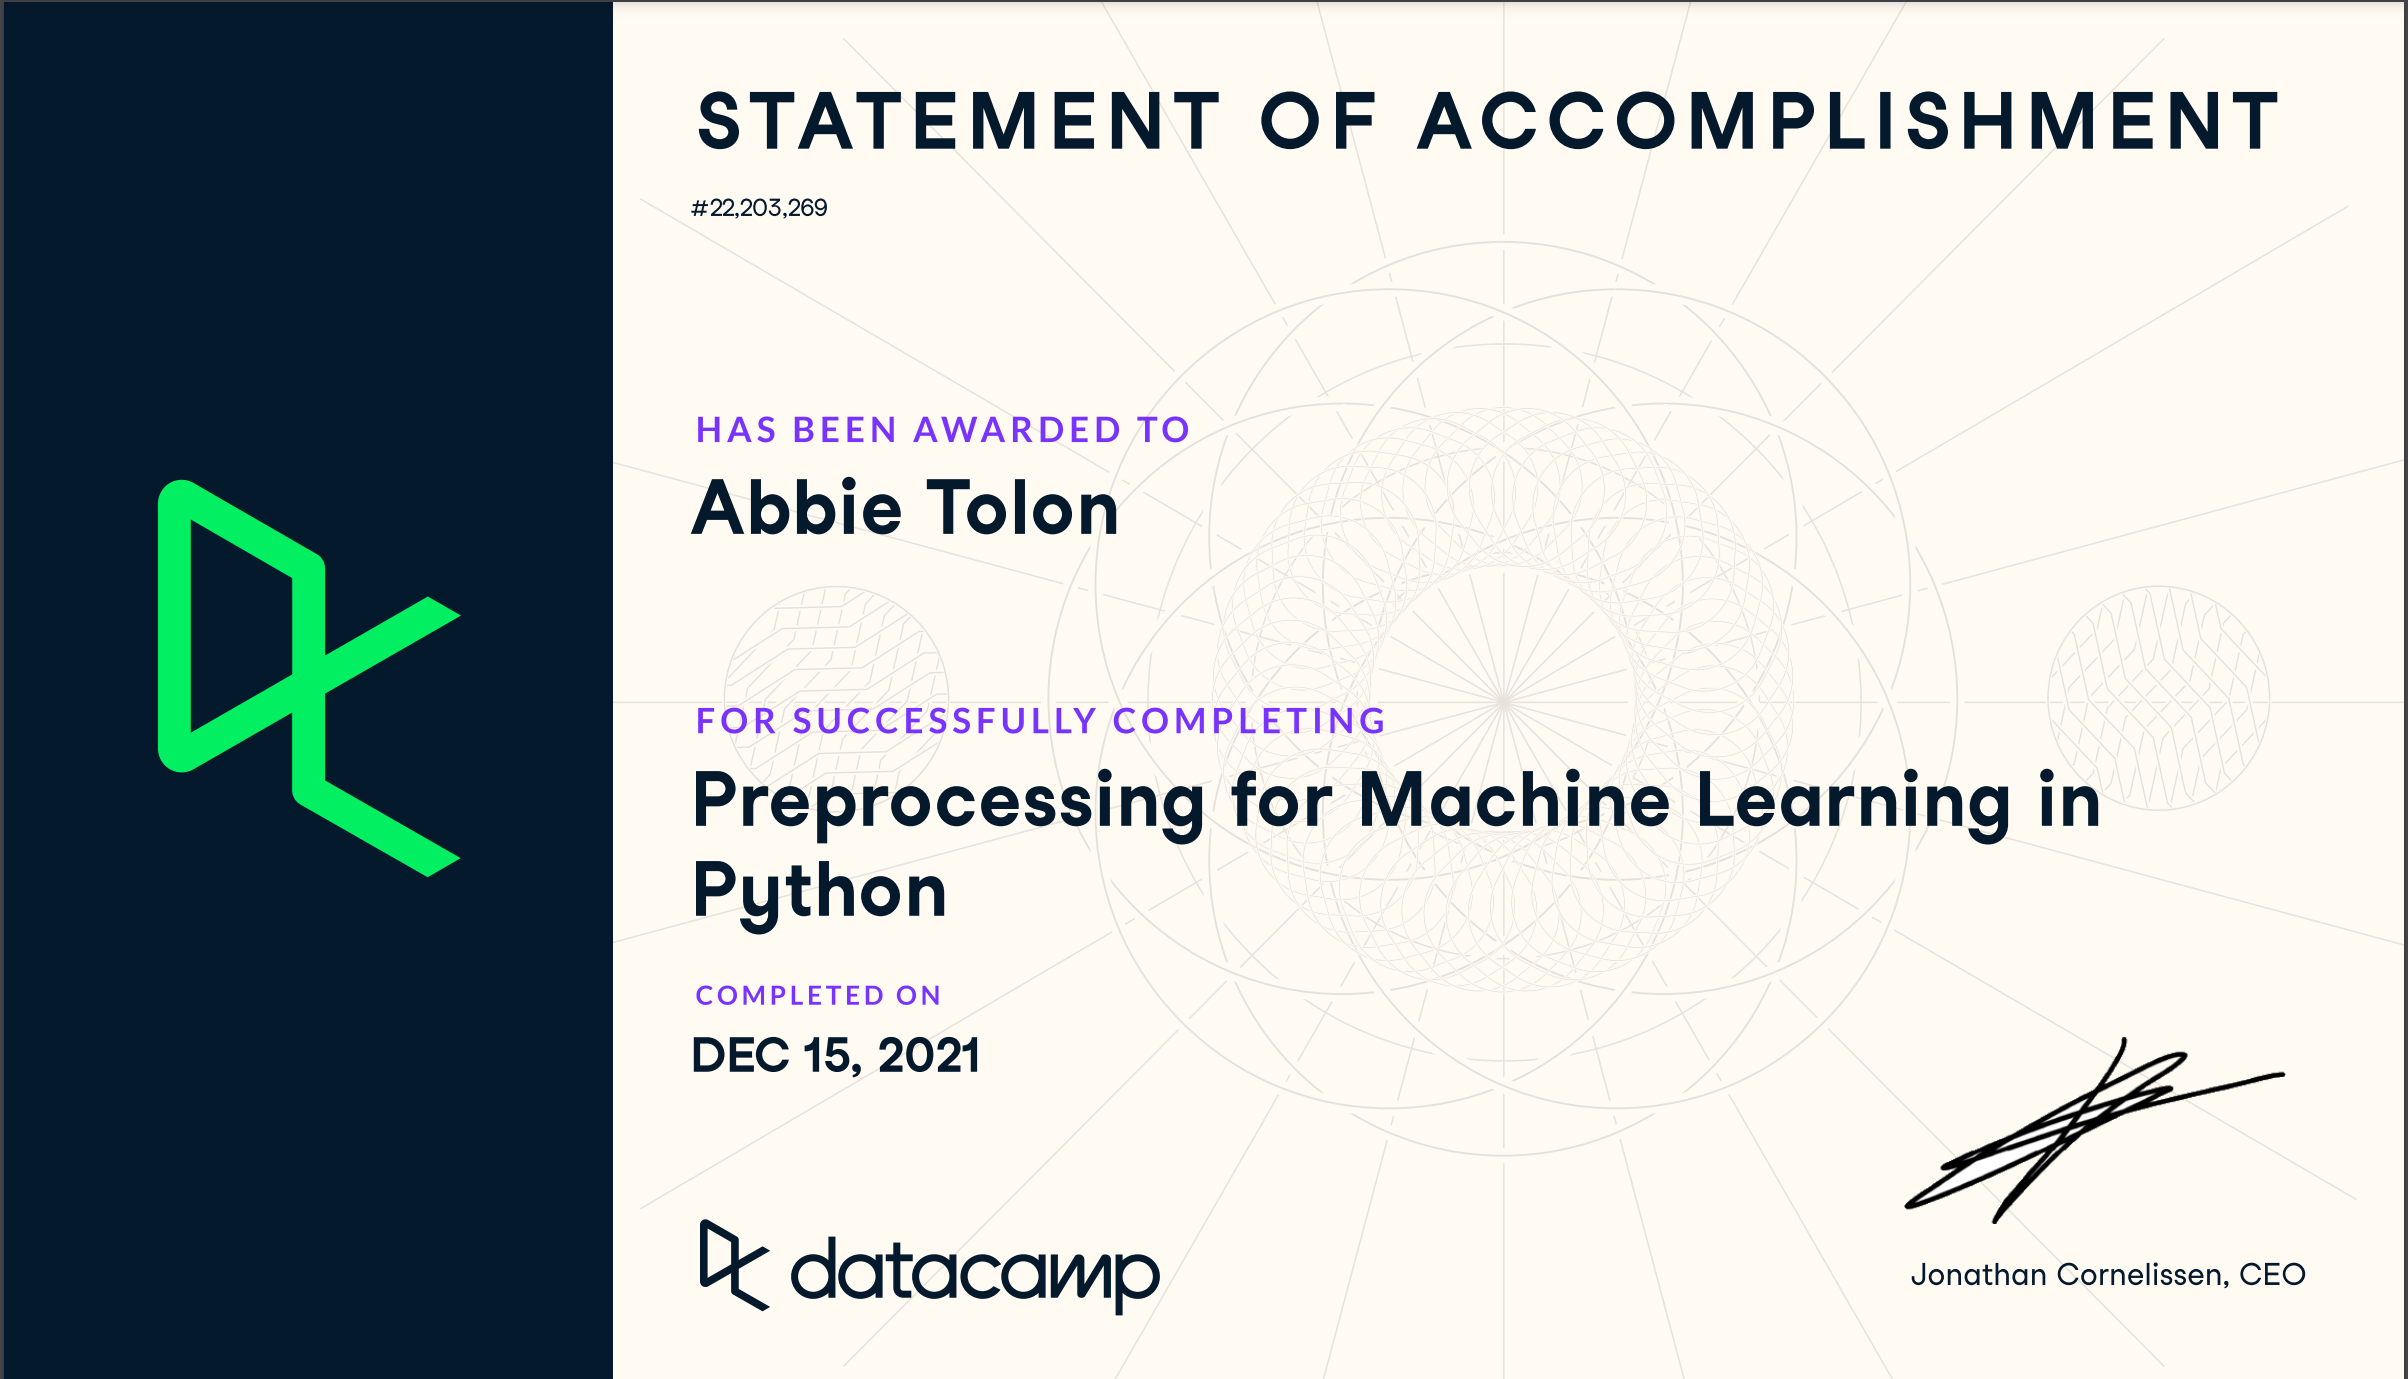